In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exercício Aula Árvore de Regressão

Tarefa para casa:

carregar a base tips ajustar uma árvore de regressão para classificar o valor do percentual da gorjeta conforme as variáveis disponíveis

- total_bill: valor total da conta
- tip: gorjeta
- sex: sexo do garçom
- smoker: mesa de fumante ou não fumante
- day: dia da semana
- time: almoço ou janta
- size: tamanho da mesa

Tentar acertar o % da gorjeta

In [135]:
tips = pd.read_csv(r'bases\tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [136]:
tips['tip_perc'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,sex,smoker,day,time,size,tip_perc
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


In [137]:
tips.describe()

,total_bill,tip,size,tip_perc
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.202123
std,8.902412,1.383638,0.951100,0.163385
min,3.070000,1.000000,1.000000,0.036955
25%,13.347500,2.000000,2.000000,0.148274
50%,17.795000,2.900000,2.000000,0.183110
75%,24.127500,3.562500,3.000000,0.236821
max,50.810000,10.000000,6.000000,2.452381


{'whiskers': [<matplotlib.lines.Line2D at 0x22031aeabb0>,
 'caps': [<matplotlib.lines.Line2D at 0x22031948b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x22031aea7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22031948310>],
 'fliers': [<matplotlib.lines.Line2D at 0x22031948850>],
 'means': []}

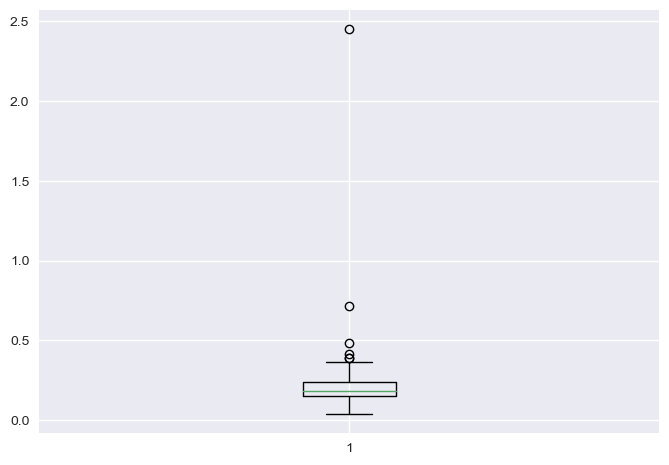

In [138]:
plt.style.use('seaborn')
plt.boxplot(tips['tip_perc'])

### Remove os Outliers

In [139]:
tips_outlier = tips[tips['tip_perc']<=1]

{'whiskers': [<matplotlib.lines.Line2D at 0x2202fbbe3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2202fb9b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2202fbbedf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2202fb9b5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2202fb9b1c0>],
 'means': []}

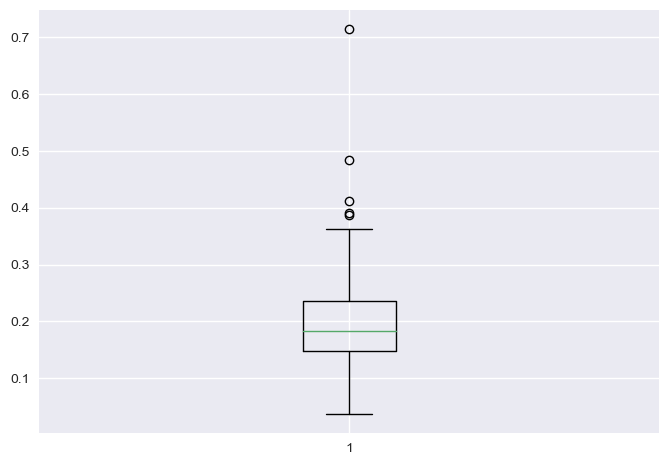

In [140]:
plt.boxplot(tips_outlier['tip_perc'])

## Correlação

In [141]:
tips_outlier.corr()

,total_bill,tip,size,tip_perc
total_bill,1.000000,0.691067,0.597725,-0.334600
tip,0.691067,1.000000,0.495998,0.330874
size,0.597725,0.495998,1.000000,-0.147912
tip_perc,-0.334600,0.330874,-0.147912,1.000000


Text(0.5, 1.0, '%Gorjeta x Total da Conta')

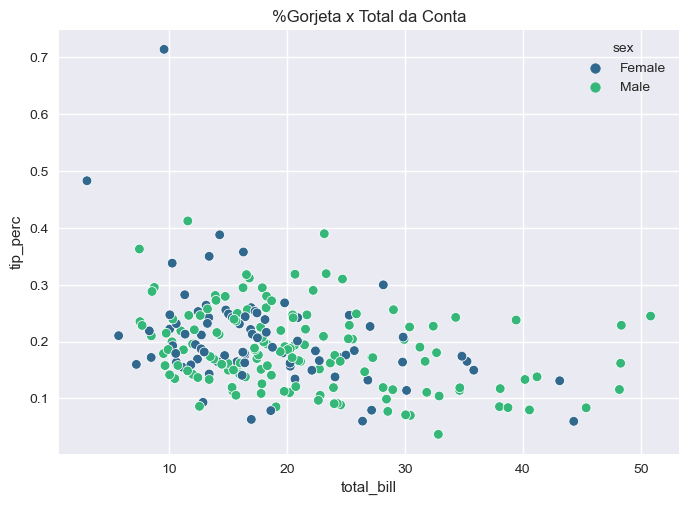

In [142]:
sns.scatterplot(x='total_bill', y='tip_perc', hue='sex', palette='viridis', data=tips_outlier)
plt.title('%Gorjeta x Total da Conta')

Text(0.5, 1.0, '%Gorjeta x Tamanho')

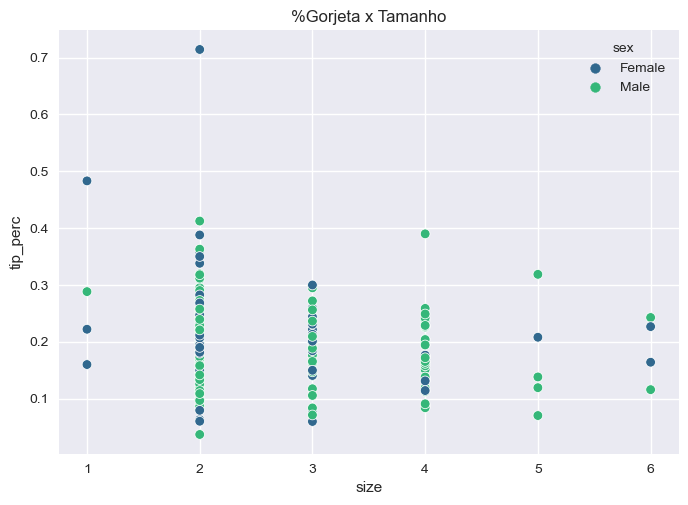

In [143]:
sns.scatterplot(x='size', y='tip_perc', hue='sex', palette='viridis', data=tips_outlier)
plt.title('%Gorjeta x Tamanho')

## Média Por Variáveis Categóricas

In [144]:
tips_outlier.groupby(['sex'])['tip_perc'].mean()

sex
Female    0.205282
Male      0.185937
Name: tip_perc, dtype: float64

In [145]:
tips_outlier.groupby(['smoker'])['tip_perc'].mean()

smoker
No     0.192237
Yes    0.193891
Name: tip_perc, dtype: float64

In [146]:
tips_outlier.groupby(['size'])['tip_perc'].mean()

size
1    0.288367
2    0.198285
3    0.182712
4    0.173820
5    0.170881
6    0.187349
Name: tip_perc, dtype: float64

In [147]:
tips_outlier.groupby(['day'])['tip_perc'].mean()

day
Fri     0.208598
Sat     0.185305
Sun     0.196029
Thur    0.194818
Name: tip_perc, dtype: float64

In [148]:
tips_outlier.groupby(['time'])['tip_perc'].mean()

time
Dinner    0.190426
Lunch     0.199135
Name: tip_perc, dtype: float64

## Aplicando Árvore Pequena

In [149]:
tips_dummie = pd.get_dummies(tips_outlier, drop_first=True)
tips_dummie

,total_bill,tip,size,tip_perc,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0.063204,0,0,0,1,0,0
1,10.34,1.66,3,0.191244,1,0,0,1,0,0
2,21.01,3.50,3,0.199886,1,0,0,1,0,0
3,23.68,3.31,2,0.162494,1,0,0,1,0,0
4,24.59,3.61,4,0.172069,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.256166,1,0,1,0,0,0
240,27.18,2.00,2,0.079428,0,1,1,0,0,0
241,22.67,2.00,2,0.096759,1,1,1,0,0,0
242,17.82,1.75,2,0.108899,1,0,1,0,0,0


In [150]:
X = tips_dummie.drop('tip_perc', axis=1)
y = tips_dummie['tip_perc']

In [151]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 2, 
                              ccp_alpha=0,
                              min_samples_split=2, 
                              random_state=123)

reg_tree_peq = model.fit(X, y)

In [152]:
tips_dummie['y_hat_peq'] = reg_tree_peq.predict(X)
tips_dummie['erro_peq'] = tips_dummie['tip_perc'] - tips_dummie['y_hat_peq']

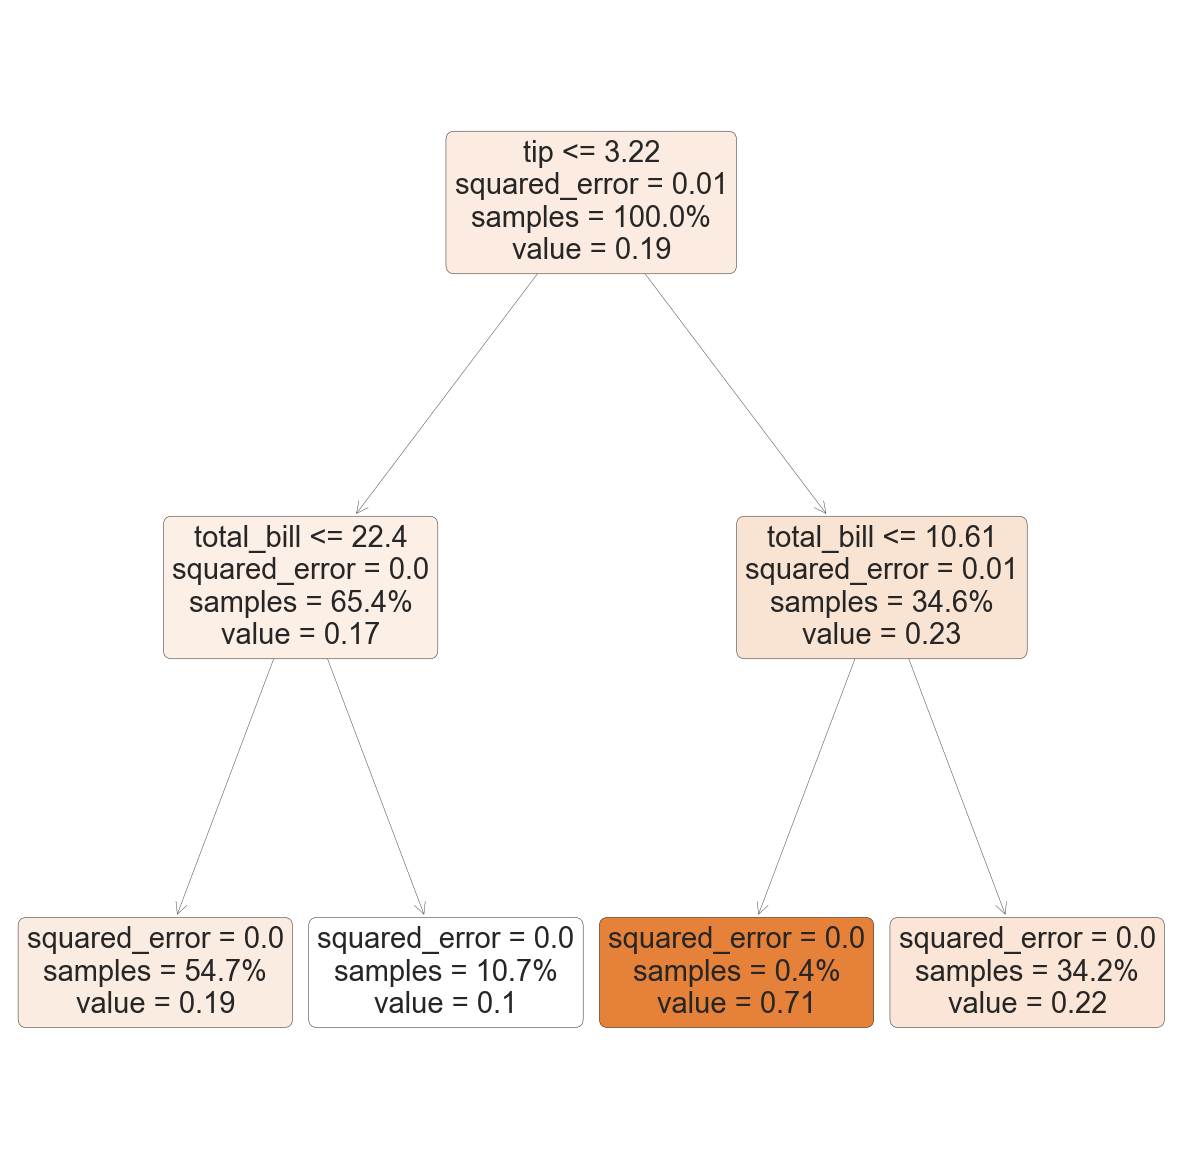

In [153]:
from sklearn.tree import plot_tree # to draw a classification tree
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(15, 15))
plot_tree(reg_tree_peq, 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2, 
          #fontsize= 10, 
          class_names=["NO", "YES"], 
          feature_names=X.columns); 

In [154]:
def indicadores (df, y, y_hat):
    n = len(df)
    SQE = sum((y - y_hat)**2)
    QME = SQE/n
    
    SST = sum((y - y.mean())**2)
    QMT = SST/n
    
    R2 = 1-SQE/SST

    print(f'SQE: {SQE}')
    print(f'QME: {QME}')
    print(f'SST: {SST}')
    print(f'QMT: {QMT}')
    print(f'R2: {R2}')

In [155]:
indicadores(tips_dummie, tips_dummie['tip_perc'], tips_dummie['y_hat_peq'] )

SQE: 0.8048512642707613
QME: 0.0033121451204558075
SST: 1.402281937908908
QMT: 0.005770707563411144
R2: 0.42604176627208024


R2 explicou 42% da variabilidade total do percentual da gorjeta que é pago

In [130]:
from sklearn.model_selection import train_test_split # to split data into training and testing sets

var_x = tips_dummie.drop('tip_perc', axis=1)

X_train, X_test, y_train, y_test = train_test_split(var_x, 
                                                    tips_dummie['tip_perc'], 
                                                    #random_state=123, 
                                                    test_size=0.25)

# Aplicando Árvore de Regressão

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [156]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 30, 
                              ccp_alpha=0, 
                              min_samples_split=2)
reg_tree = model.fit(X, y)

In [157]:
tips_dummie['y_hat_livre'] = reg_tree.predict(X)
tips_dummie['erro_livre'] = tips_dummie['tip_perc'] - tips_dummie['y_hat_livre']

## Avaliando Indicadores

In [159]:
indicadores(tips_dummie, y, tips_dummie.y_hat_livre)

SQE: 0.0
QME: 0.0
SST: 1.402281937908908
QMT: 0.005770707563411144
R2: 1.0


<AxesSubplot:xlabel='total_bill', ylabel='tip_perc'>

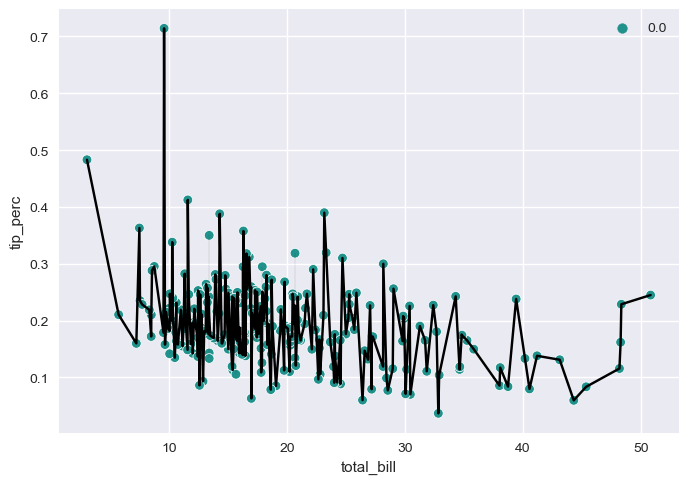

In [160]:
sns.scatterplot(x='total_bill', y='tip_perc', hue='erro_livre', palette='viridis', data=tips_dummie)
sns.lineplot(x='total_bill', y='y_hat_livre', data=tips_dummie, color='black')

<AxesSubplot:xlabel='total_bill', ylabel='erro_livre'>

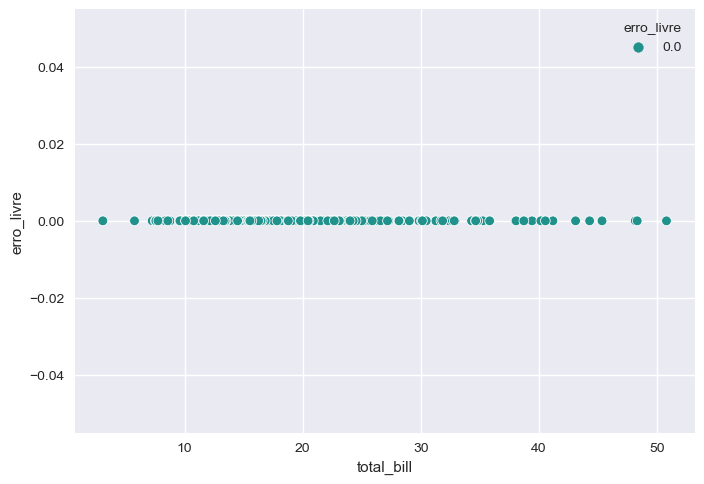

In [161]:
sns.scatterplot(x='total_bill', y='erro_livre', hue='erro_livre', palette='viridis', data=tips_dummie)

## Encontrando Melhor CCP_ALPHA

<AxesSubplot:xlabel='alpha'>

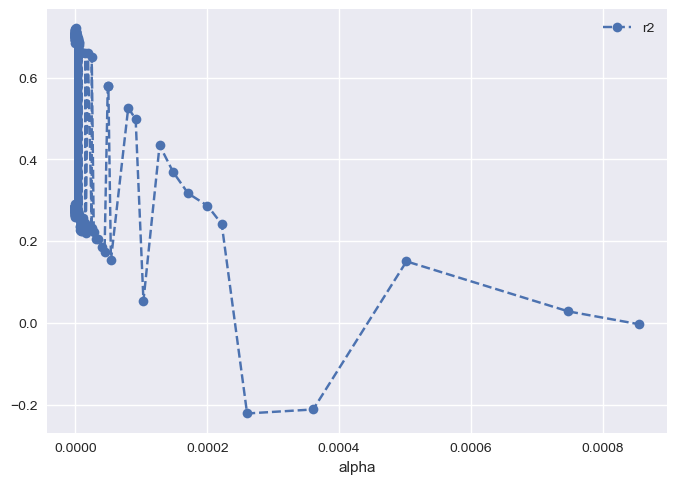

In [162]:
from sklearn.model_selection import cross_val_score # for cross validation

path = reg_tree.cost_complexity_pruning_path(X, y) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha

# create an array to store the results of each fold during cross validiation
alpha_loop_values = []

## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X, y, cv=10, scoring='r2')
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

## Now we can draw a graph of the means and standard deviations of the scores
## for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'r2', 'std'])

alpha_results.plot(x='alpha', 
                   y='r2', 
                   #yerr='std', 
                   marker='o', 
                   linestyle='--')

In [163]:
results = alpha_results[(alpha_results['alpha'] > 0.00001)
              &
              (alpha_results['alpha'] < 0.00005)]

results[results['r2'] == results['r2'].max()]

,alpha,r2,std
201,0.000019,0.66137,0.15438


In [164]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

path = reg_tree.cost_complexity_pruning_path(X, y)

lista_ccp_alphas = pd.DataFrame(path)

lista_alphas = {'ccp_alpha': np.array(lista_ccp_alphas.ccp_alphas)}

grid_search = GridSearchCV(reg_tree, lista_alphas, cv=10, scoring='r2')
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(ccp_alpha=0, max_depth=30),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.29404793e-13, 3.23644142e-11, 1.06213105e-10,
       1.13165341e-10, 1.70530324e-10, 3.44521222e-10, 4.26724095e-10,
       5.39393708e-10, 5.39459995e-10, 6.06434215e-10, 6.67135047e-10,
       6.70916655e-10, 7.22306904e-10, 1.29460368e-09, 1.64289980e-09,
       1....
       1.58005121e-05, 1.90192114e-05, 2.47816016e-05, 2.48199130e-05,
       2.78637959e-05, 3.17104061e-05, 3.42150587e-05, 4.05109278e-05,
       4.42192566e-05, 4.90846979e-05, 5.00093747e-05, 5.39207853e-05,
       8.01460153e-05, 9.14051462e-05, 1.03248974e-04, 1.27728472e-04,
       1.48414415e-04, 1.70981753e-04, 2.00386600e-04, 2.22004783e-04,
       2.60519520e-04, 3.60778295e-04, 5.02377484e-04, 7.48076447e-04,
       8.55242998e-04])},
             scoring='r2')

In [165]:
best_alpha_gs = grid_search.best_params_['ccp_alpha']
best_score_gs = grid_search.best_score_
print("Melhor valor de ccp_alpha:", best_alpha_gs)
print("Desempenho correspondente:", best_score_gs)

Melhor valor de ccp_alpha: 4.423794877884905e-09
Desempenho correspondente: 0.7212828392920354


## Modelo com Poda

In [190]:
best_alpha = results.loc[results['r2'] == results['r2'].max()].iloc[0].iloc[0]

In [191]:
model_poda = DecisionTreeRegressor(max_depth = 30, 
                                   ccp_alpha=best_alpha, 
                                   min_samples_split=2)
reg_tree_poda = model_poda.fit(X, y)

In [192]:
tips_dummie['y_hat_poda'] = reg_tree_poda.predict(X)
tips_dummie['erro_poda'] = tips_dummie['tip_perc'] - tips_dummie['y_hat_poda']

In [193]:
indicadores(tips_dummie, tips_dummie.tip_perc, tips_dummie.y_hat_poda)

SQE: 0.09177585454680319
QME: 0.0003776784137728526
SST: 1.402281937908908
QMT: 0.005770707563411144
R2: 0.9345524947118267


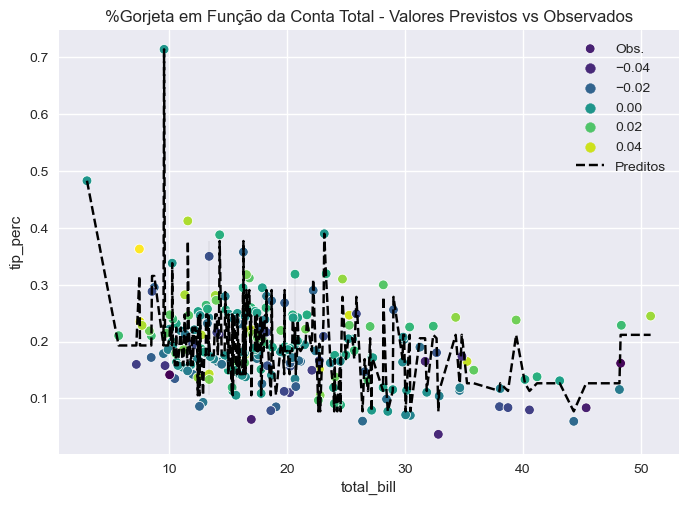

In [194]:
sns.scatterplot(x='total_bill', 
                y='tip_perc', 
                hue='erro_poda', 
                palette='viridis', 
                data=tips_dummie, 
                label='Obs.')

sns.lineplot(x='total_bill', 
             y='y_hat_poda', 
             data=tips_dummie, 
             color='black', 
             label='Preditos', 
             linestyle='--')
plt.title('%Gorjeta em Função da Conta Total - Valores Previstos vs Observados')
plt.legend()

<AxesSubplot:xlabel='total_bill', ylabel='erro_poda'>

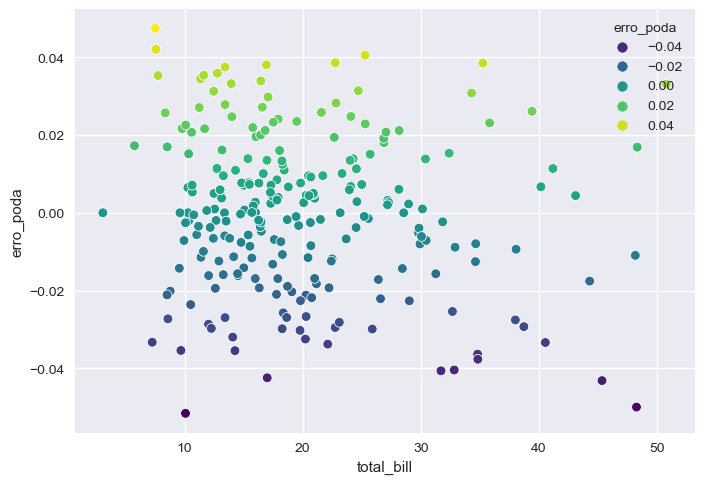

In [195]:
sns.scatterplot(x='total_bill', y='erro_poda', hue='erro_poda', palette='viridis', data=tips_dummie)

<AxesSubplot:xlabel='size', ylabel='tip_perc'>

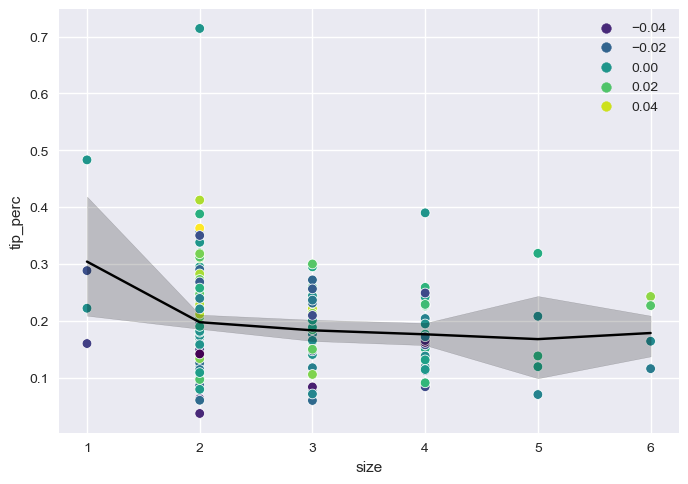

In [196]:
sns.scatterplot(x='size', y='tip_perc', hue='erro_poda', palette='viridis', data=tips_dummie)
sns.lineplot(x='size', y='y_hat_poda', data=tips_dummie, color='black')

In [197]:
reg_tree_poda.get_depth()

8

## Plotando a Árvore

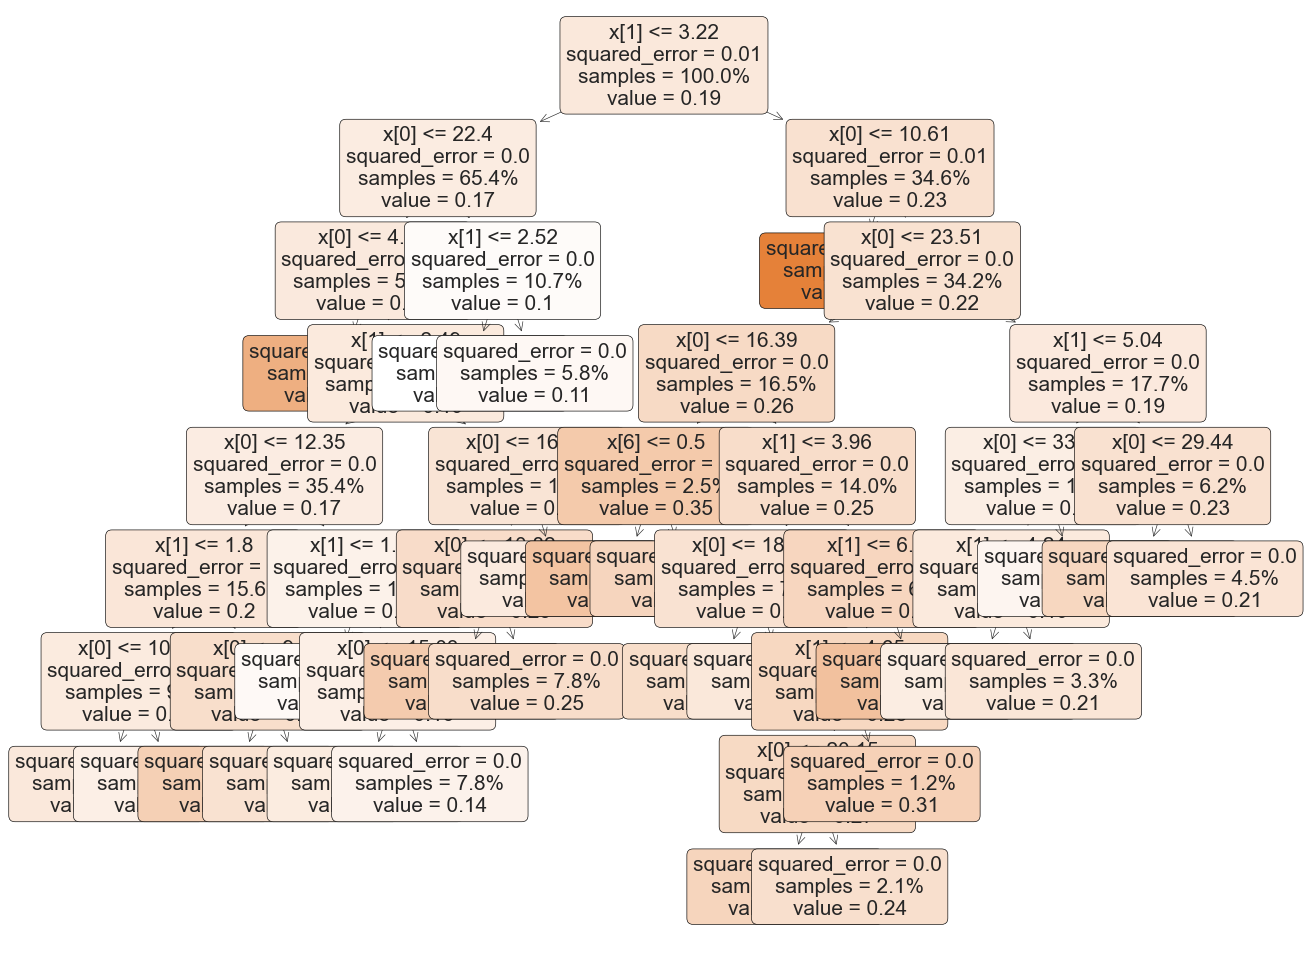

In [198]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(reg_tree_poda, 
          filled=True, 
          rounded=True, 
          proportion=True, 
          precision=2,
          #class_names=["NO", "YES"],
          fontsize= 10, );